In [1]:
import tweepy
import configparser
import pandas as pd 
import re
from textblob import TextBlob
import matplotlib.pyplot as plt

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

api_key = config['twitter']['api_key']
api_key_secret = config['twitter']['api_key_secret']
access_token = config['twitter']['access_token']
access_token_secret = config['twitter']['access_token_secret']

# Authentication

In [3]:
auth = tweepy.OAuthHandler(api_key,api_key_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)
print('Auth done')

Auth done


In [ ]:
# run this if you have the csv file is same folder
df = pd.read_csv('50twts.csv')


In [ ]:
# run this if you are running this on google colab and upload the csv then run pandas read_csv()
from google.colab import files
files.upload()

# Keywords, accouts 

In [27]:
##################################
#DO NOT RUN THIS CELLL
#DO 
#    NOT
#         RUN
#              THIS 
#                     CELL
##################################
name = ['BillGates','ElonMusk','JeffBezos']
posts = api.user_timeline(screen_name = name, count = 50, tweet_mode='extended')
i= 1
for tweet in posts:
    print(str(i)+') '+tweet.full_text + '\n')
    i=i+1

1) RT @sylvainsarrailh: Some lights in the night: https://t.co/7I1BWU4DIE

2) RT @AngelsWhisperr: Graveyard sculptures. https://t.co/pG8IxRc25X

3) RT @fl0mtv: Last one went super smooth and was chill so lets run it back

Lets give this away in a week.

1. Follow @fl0mtv
2. Like this po…

4) RT @kemar74: I'm often inspired by Moebius. Here are some awkward attempts to let his body of works direct somehow the pieces. https://t.co…

5) RT @JustHarryGG: Unboxed these nasty little things lol

RT + Follow, I'll give them away in 10 days, cause I'm never using them ever https:…

6) RT @kamimayo17: More valo cats for cat day 😼 #ValorantArt #猫の日 https://t.co/3qpC4kjPEL

7) RT @floaromaa: https://t.co/U2VGKkIoEm

8) RT @Pimp_CSGO: As promised on stream a quick giveaway for all you lovely boys n girls! 

1. Follow @Pimp_CSGO
2. Like this post
3. RT this…

9) @engineers_feed Ctrl + tab on Chrome switches through all the tabs

10) RT @sunakoart: Moment 🤎 https://t.co/EkJy06FX2J

11) RT @FadingzZ: 

In [5]:
posts

[Status(_api=<tweepy.api.API object at 0x000001AD7B003A90>, _json={'created_at': 'Thu Mar 31 17:15:50 +0000 2022', 'id': 1509580238681825280, 'id_str': '1509580238681825280', 'full_text': 'RT @sylvainsarrailh: Some lights in the night: https://t.co/7I1BWU4DIE', 'truncated': False, 'display_text_range': [0, 70], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'sylvainsarrailh', 'name': 'Tohad', 'id': 293479676, 'id_str': '293479676', 'indices': [3, 19]}], 'urls': [], 'media': [{'id': 1509523298010353665, 'id_str': '1509523298010353665', 'indices': [47, 70], 'media_url': 'http://pbs.twimg.com/media/FPLncRYVUAELNJX.jpg', 'media_url_https': 'https://pbs.twimg.com/media/FPLncRYVUAELNJX.jpg', 'url': 'https://t.co/7I1BWU4DIE', 'display_url': 'pic.twitter.com/7I1BWU4DIE', 'expanded_url': 'https://twitter.com/sylvainsarrailh/status/1509523672364593153/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 680, 'h': 383,

In [4]:
# RUN THIS

search_query = '#PowerShortageInIndia -filter:retweets'
tweets = tweepy.Cursor(api.search_tweets, q=search_query, lang='en', tweet_mode='extended').items(1000)

all_tweets = [tweet.full_text for tweet in tweets]

In [5]:
all_tweets

['If only electricity can be generated from religious hatred Narendra Modi\nwould’ve made India the sustainable energy capital of the world! \n#PowerShortageInIndia',
 "Due to BJP's poor administration according to government data, Jharkhand Bihar, Haryana and Uttarakhand have reported power shortages of over 3 percent each.\n#PowerShortageInIndia",
 '#PowerShortageInIndia yesterday @mkstalin please consider this matter sir..',
 'Andhra Pradesh, Karnataka, Bihar, Madhya Pradesh, Jharkhand, Punjab, Haryana, Rajasthan, Telangana and Uttar Pradesh have started seeing power cuts over the last few days Due to mismanagement &amp; poor administration of BJP.\n#PowerShortageInIndia',
 'Coal shortage is being witnessed in 12 states once again after 2021 The depleting coal inventory of domestic thermal power plants has prompted PSU power engineers to warn of an impending energy crisis. Failure of Modi Govt!\n#PowerShortageInIndia',
 'India is in darkness... The BJP is falsely propagating that In

In [6]:
df = pd.DataFrame(all_tweets,columns=['Tweets'])

In [7]:
df.head()
df.tail()

,Tweets
995,#PowerShortageInIndia\nWhole Nation is in Dang...
996,India is in danger of sinking into darkness du...
997,"It's #verybad, if it is continuing like this t..."
998,Coal shortage is being witnessed in 12 states ...
999,#Power crisis likely to worsen in as many as 1...


In [8]:
def cleantt(tw):
    tw = re.sub('#bitcoin','bitcoin',tw)
    tw = re.sub('#Bitcoin','Bitcoin',tw)
    tw = re.sub('#[A-Za-z0-9]+', '', tw)
    tw = re.sub('\\n', '',tw)
    tw = re.sub('https?:\/\/\S+','',tw)
    tw = re.sub('[@#]','',tw)
    
    return tw

In [9]:
def re_emotions(tw):
    #text = u'This dog \U0001f602'
    #print(text) # with emoji
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

    print(emoji_pattern.sub(r'', tw)) # no emoji

#import re
#re_emotions()

In [14]:
df['Cleaned_Tweets'] = df['Tweets'].apply(cleantt)
#df['Cleaned_Tweets'] = df['Tweets'].apply(re_emotions)

In [15]:
df

,Tweets,Cleaned_Tweets
0,If only electricity can be generated from reli...,If only electricity can be generated from reli...
1,Due to BJP's poor administration according to ...,Due to BJP's poor administration according to ...
2,#PowerShortageInIndia yesterday @mkstalin plea...,yesterday mkstalin please consider this matte...
3,"Andhra Pradesh, Karnataka, Bihar, Madhya Prade...","Andhra Pradesh, Karnataka, Bihar, Madhya Prade..."
4,Coal shortage is being witnessed in 12 states ...,Coal shortage is being witnessed in 12 states ...
...,...,...
995,#PowerShortageInIndia\nWhole Nation is in Dang...,Whole Nation is in Danger in the hands of vamp...
996,India is in danger of sinking into darkness du...,India is in danger of sinking into darkness du...
997,"It's #verybad, if it is continuing like this t...","It's , if it is continuing like this there won..."
998,Coal shortage is being witnessed in 12 states ...,Coal shortage is being witnessed in 12 states ...


In [16]:
df.to_csv('1000_3rd-timetwts.csv')

In [17]:
def subjectivity(tw):
    return TextBlob(tw).sentiment.subjectivity

def polarity(tw):
    return TextBlob(tw).sentiment.polarity


df['Subjectivity'] = df['Cleaned_Tweets'].apply(subjectivity)
df['Polarity'] = df['Cleaned_Tweets'].apply(polarity)

In [18]:
df

,Tweets,Cleaned_Tweets,Subjectivity,Polarity
0,If only electricity can be generated from reli...,If only electricity can be generated from reli...,0.625000,0.000000
1,Due to BJP's poor administration according to ...,Due to BJP's poor administration according to ...,0.487500,-0.262500
2,#PowerShortageInIndia yesterday @mkstalin plea...,yesterday mkstalin please consider this matte...,0.000000,0.000000
3,"Andhra Pradesh, Karnataka, Bihar, Madhya Prade...","Andhra Pradesh, Karnataka, Bihar, Madhya Prade...",0.285417,-0.181250
4,Coal shortage is being witnessed in 12 states ...,Coal shortage is being witnessed in 12 states ...,0.200000,-0.197917
...,...,...,...,...
995,#PowerShortageInIndia\nWhole Nation is in Dang...,Whole Nation is in Danger in the hands of vamp...,0.400000,0.200000
996,India is in danger of sinking into darkness du...,India is in danger of sinking into darkness du...,0.375000,-0.156250
997,"It's #verybad, if it is continuing like this t...","It's , if it is continuing like this there won...",0.500000,-0.250000
998,Coal shortage is being witnessed in 12 states ...,Coal shortage is being witnessed in 12 states ...,0.100000,0.000000


In [19]:
def Gsentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [20]:
df['Sentiment'] = df['Polarity'].apply(Gsentiment)


In [21]:
df

,Tweets,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
0,If only electricity can be generated from reli...,If only electricity can be generated from reli...,0.625000,0.000000,Neutral
1,Due to BJP's poor administration according to ...,Due to BJP's poor administration according to ...,0.487500,-0.262500,Negative
2,#PowerShortageInIndia yesterday @mkstalin plea...,yesterday mkstalin please consider this matte...,0.000000,0.000000,Neutral
3,"Andhra Pradesh, Karnataka, Bihar, Madhya Prade...","Andhra Pradesh, Karnataka, Bihar, Madhya Prade...",0.285417,-0.181250,Negative
4,Coal shortage is being witnessed in 12 states ...,Coal shortage is being witnessed in 12 states ...,0.200000,-0.197917,Negative
...,...,...,...,...,...
995,#PowerShortageInIndia\nWhole Nation is in Dang...,Whole Nation is in Danger in the hands of vamp...,0.400000,0.200000,Positive
996,India is in danger of sinking into darkness du...,India is in danger of sinking into darkness du...,0.375000,-0.156250,Negative
997,"It's #verybad, if it is continuing like this t...","It's , if it is continuing like this there won...",0.500000,-0.250000,Negative
998,Coal shortage is being witnessed in 12 states ...,Coal shortage is being witnessed in 12 states ...,0.100000,0.000000,Neutral


Text(0, 0.5, 'Subjectivity')

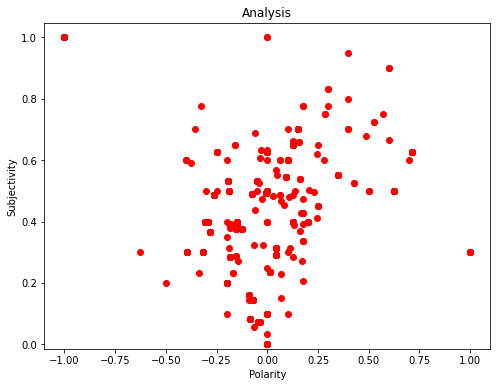

In [22]:
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Red')
plt.title('Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

Text(0, 0.5, 'Count')

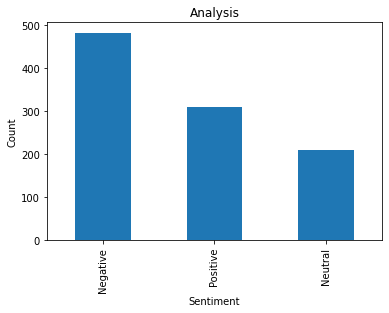

In [23]:
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')